### Class Test
Note:
1. Time Limit: __30 minutes__
2. No AI Agents allowed. Direct __disqualification__ if caught using any AI agent.
3. You can refer to previous class's worksheet and Pytorch's official documentation only. https://docs.pytorch.org/docs/stable/index.html
4. Paste the answers of Q1 to Q5 on the google form. https://forms.gle/zj6pZMZD3UDqVPQdA
5. Total Weightage: 5%

### Consider a Neural Network (StrangeNN) that takes as input a 20 Dimensional feature vector, $X$ , and outputs a vector $\hat{X}$ such that $\hat{X}$ tries to be as close $X$. StrangeNN is composed of 5 layers ($L_1$ to $L_5$) having the sizes as mentioned below.

Each layer in StrangeNN, $L_1$ to $L_5$, is an nn.linear layer with ReLU non-linearity. There’s no ReLU after $L_3$ and $L_5$.

Note: Don’t use the nn.Sequential construct to code the layers. At every step of the training process the forward function returns not just $\hat{X}$) but also the output of $L_3$ (let’s call it $\hat{z}$). $\hat{z}$ is called as the latent dimension for this Network.

Use tensor.clone().detach() to extract out z from L3.

Q1. Complete the __init__ function of StrangeNN - 5 pts

Q2. Complete the forward function of StrangeNN - 10 pts

Q3. Suggest a suitable metric to make sure that $X$ is as close $\hat{X}$ as possible - 3 pts

Q4. Backpropagate the loss into StrangeNN - 2 pts

Q5. Plot $\hat{z}$ in matplotlib and upload your plot into the google form - 0 pts.

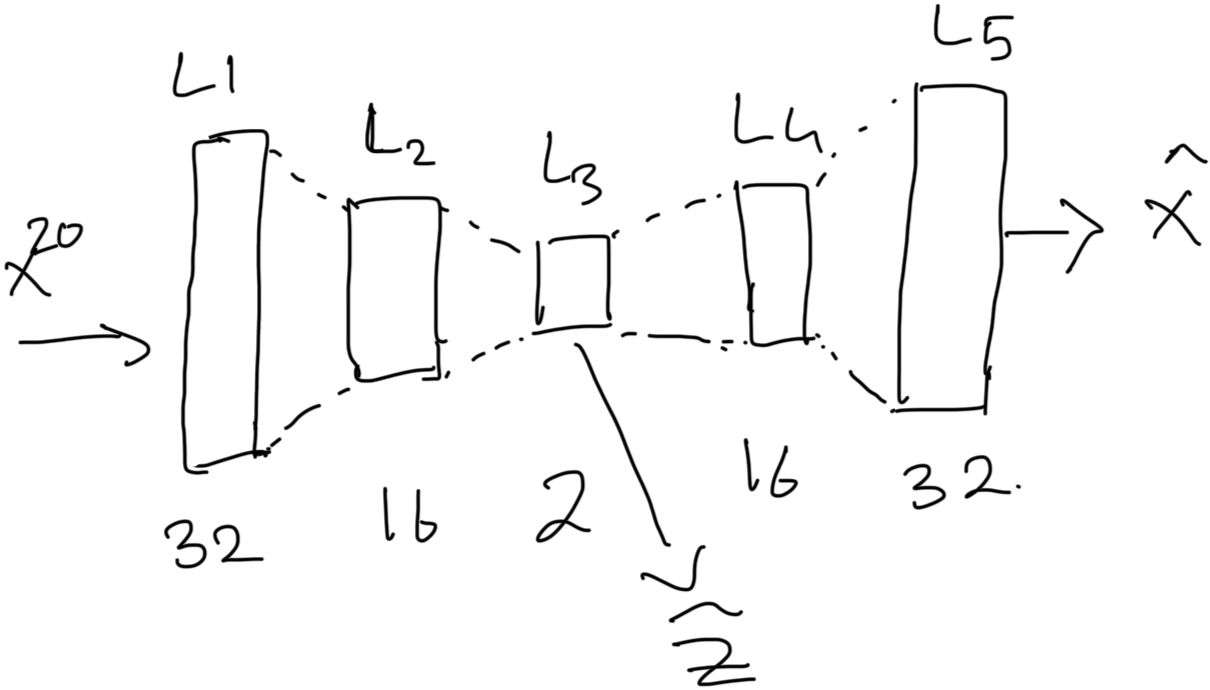

In [12]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import numpy as np

np.random.seed(42)

# ---- Synthetic high-dimensional data ----
n_samples = 30000
n_features = 20
n_clusters = 5

X, y = make_blobs(
    n_samples=n_samples,
    centers=n_clusters,
    n_features=n_features,
    cluster_std=1.5,
    random_state=42
)

X = torch.tensor(X, dtype=torch.float32)

In [ ]:
class StrangeNN(nn.Module):
    def __init__(self, input_dim=20, latent_dim=2):
        super(StrangeNN, self).__init__()
        # Complete the function - 5 pts
        self.fc1 = nn.Linear(input_dim, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, latent_dim)
        self.fc4 = nn.Linear(latent_dim, 64)
        self.fc5 = nn.Linear(64, input_dim)


    def forward(self, x):
        # Complete the function - 10 pts
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        z = self.fc3(x)
        x = torch.relu(self.fc4(z))
        out = self.fc5(x)
        return out, z.clone().detach()

In [15]:
# ---- Initialize model ----
model = StrangeNN()
optimizer = optim.Adam(model.parameters(), lr=0.005)
criterion = nn.MSELoss()# choose appropriate loss function - 3 pts

# ---- Training ----
n_epochs = 2000
for epoch in range(n_epochs):
    optimizer.zero_grad()
    x_cap, z = model(X)
    loss = criterion(x_cap, X)
    # backpropagate the loss - 2 pts
    loss.backward()
    optimizer.step()

    if epoch % 20 == 0:
        print(f"Epoch {epoch:03d}: Loss = {loss.item():.4f}")

Epoch 000: Loss = 37.5892
Epoch 020: Loss = 21.1764
Epoch 040: Loss = 7.9866
Epoch 060: Loss = 5.0784
Epoch 080: Loss = 3.3994
Epoch 100: Loss = 2.3758
Epoch 120: Loss = 2.1028
Epoch 140: Loss = 2.0719
Epoch 160: Loss = 2.0638
Epoch 180: Loss = 2.0568
Epoch 200: Loss = 2.0514
Epoch 220: Loss = 2.0473
Epoch 240: Loss = 2.0439
Epoch 260: Loss = 2.0411
Epoch 280: Loss = 2.0389
Epoch 300: Loss = 2.0370
Epoch 320: Loss = 2.0355
Epoch 340: Loss = 2.0342
Epoch 360: Loss = 2.0332
Epoch 380: Loss = 2.0324
Epoch 400: Loss = 2.0317
Epoch 420: Loss = 2.0311
Epoch 440: Loss = 2.0306
Epoch 460: Loss = 2.0302
Epoch 480: Loss = 2.0298
Epoch 500: Loss = 2.0295
Epoch 520: Loss = 2.0293
Epoch 540: Loss = 2.0291
Epoch 560: Loss = 2.0289
Epoch 580: Loss = 2.0287
Epoch 600: Loss = 2.0286
Epoch 620: Loss = 2.0285
Epoch 640: Loss = 2.0283
Epoch 660: Loss = 2.0283
Epoch 680: Loss = 2.0282
Epoch 700: Loss = 2.0281
Epoch 720: Loss = 2.0280
Epoch 740: Loss = 2.0280
Epoch 760: Loss = 2.0279
Epoch 780: Loss = 2.027

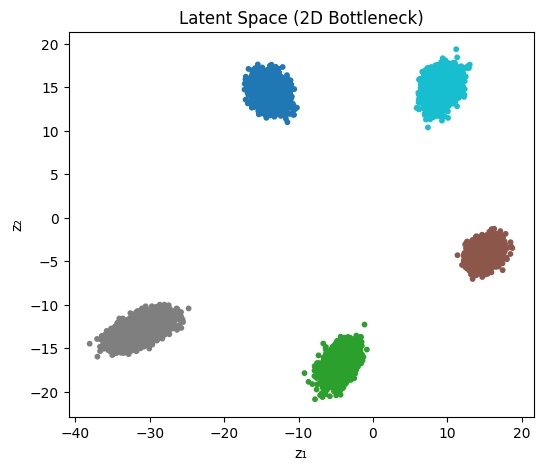

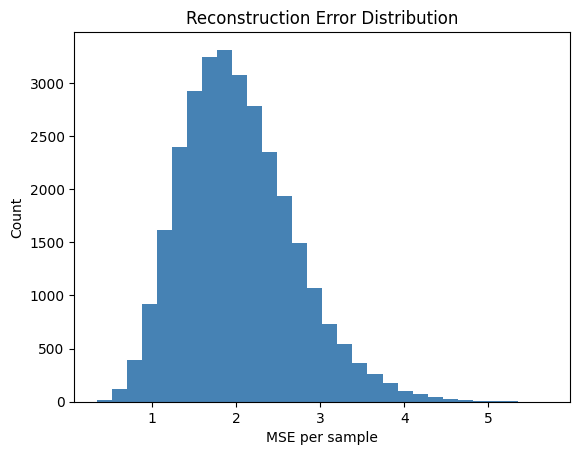

In [16]:
# ---- Visualization ----
with torch.no_grad():
    _, Z = model(X)
    X_recon, _ = model(X)

# Latent space visualization (the 2D bottleneck)
plt.figure(figsize=(6,5))
plt.scatter(Z[:, 0], Z[:, 1], c=y, cmap='tab10', s=10)
plt.title("Latent Space (2D Bottleneck)")
plt.xlabel("z₁")
plt.ylabel("z₂")
plt.show()

# Compare reconstruction error distribution
recon_error = ((X - X_recon)**2).mean(dim=1)
plt.hist(recon_error.numpy(), bins=30, color='steelblue')
plt.title("Reconstruction Error Distribution")
plt.xlabel("MSE per sample")
plt.ylabel("Count")
plt.show()